## Plot for processed_dataset ADLS

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
import seaborn as sns


In [40]:
datad01 = pd.read_csv('./proccessed_data/D01.csv')
datad01

,impact_max,freefall_min,acc_range,acc_sma,jerk_max,jerk_mean,acc_mean,acc_std,acc_kurtosis,acc_skewness,acc_post_std,gyro_max,gyro_mean,tilt_angle_change,label
0,12.944883,7.637408,5.307475,13.454,170.293864,47.180157,9.680306,1.173292,0.226312,0.763871,1.569243,6.394529,2.224124,1.810084,0
1,11.844408,9.155326,2.689082,16.070,38.078866,15.489774,10.157374,0.725027,0.281083,1.023484,0.542178,2.158703,0.838177,0.525783,0
2,12.414105,7.947327,4.466778,15.114,74.330344,28.019118,9.848614,1.011261,0.205868,0.827555,0.923047,2.211334,1.101343,0.982999,0
3,14.831386,7.213876,7.617510,16.104,145.430396,45.600271,10.272677,2.215647,-1.122179,0.202995,1.567106,2.549510,1.650661,0.689839,0
4,14.760081,7.316420,7.443661,16.466,128.937970,45.884247,10.480441,1.802083,-0.363161,0.428960,2.125964,2.983287,1.633311,0.451575,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,14.043504,5.595534,8.447970,15.046,159.530561,50.898603,10.522779,2.034630,-0.356545,-0.329340,2.177273,2.336664,1.352515,0.644986,0
673,14.438144,7.692854,6.745290,14.580,110.905365,41.000682,10.275846,1.813270,-0.524282,0.520094,1.874883,2.886174,1.612229,0.676279,0
674,18.113255,7.184706,10.928549,14.280,220.113607,53.901727,10.072108,2.197733,3.223514,1.667967,2.474200,3.334666,1.744342,0.659888,0
675,14.439183,7.142129,7.297054,14.926,114.236597,49.733013,10.060548,1.636311,-0.018719,0.685752,1.175591,2.875761,1.740177,0.665616,0


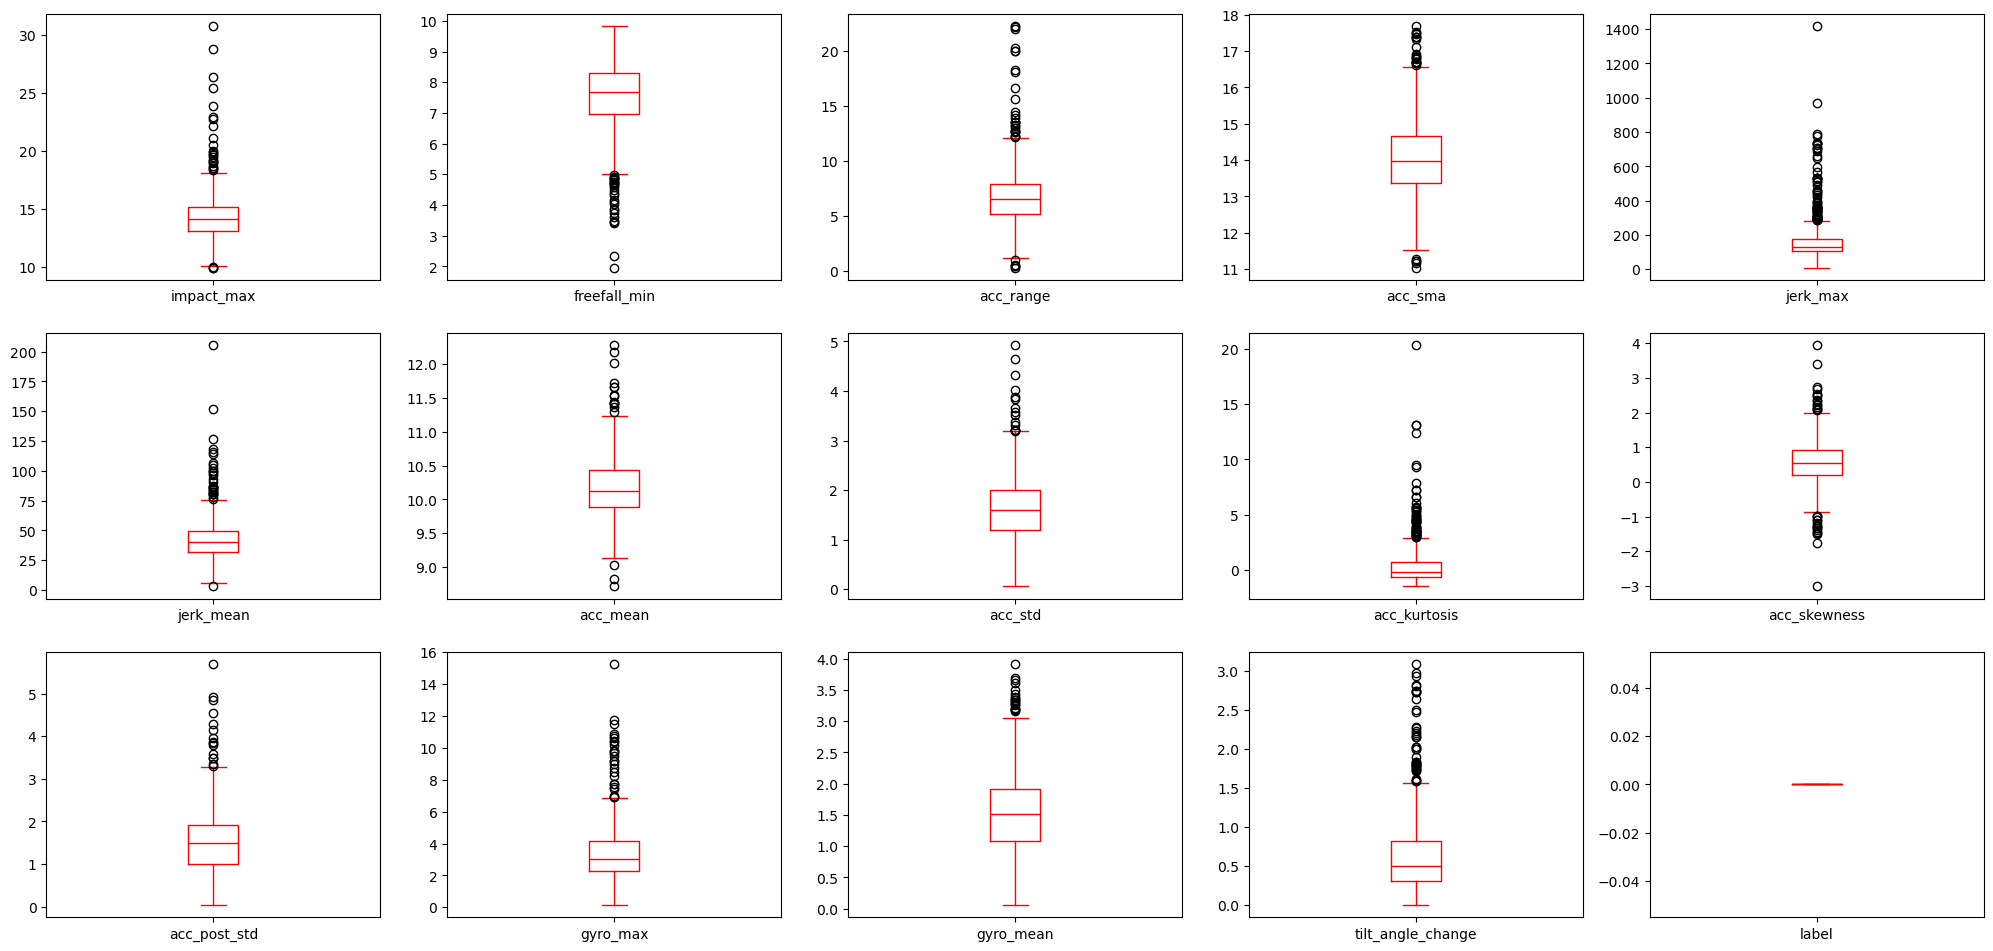

In [24]:
datad01.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(25,20), color='red');

# Heatmap

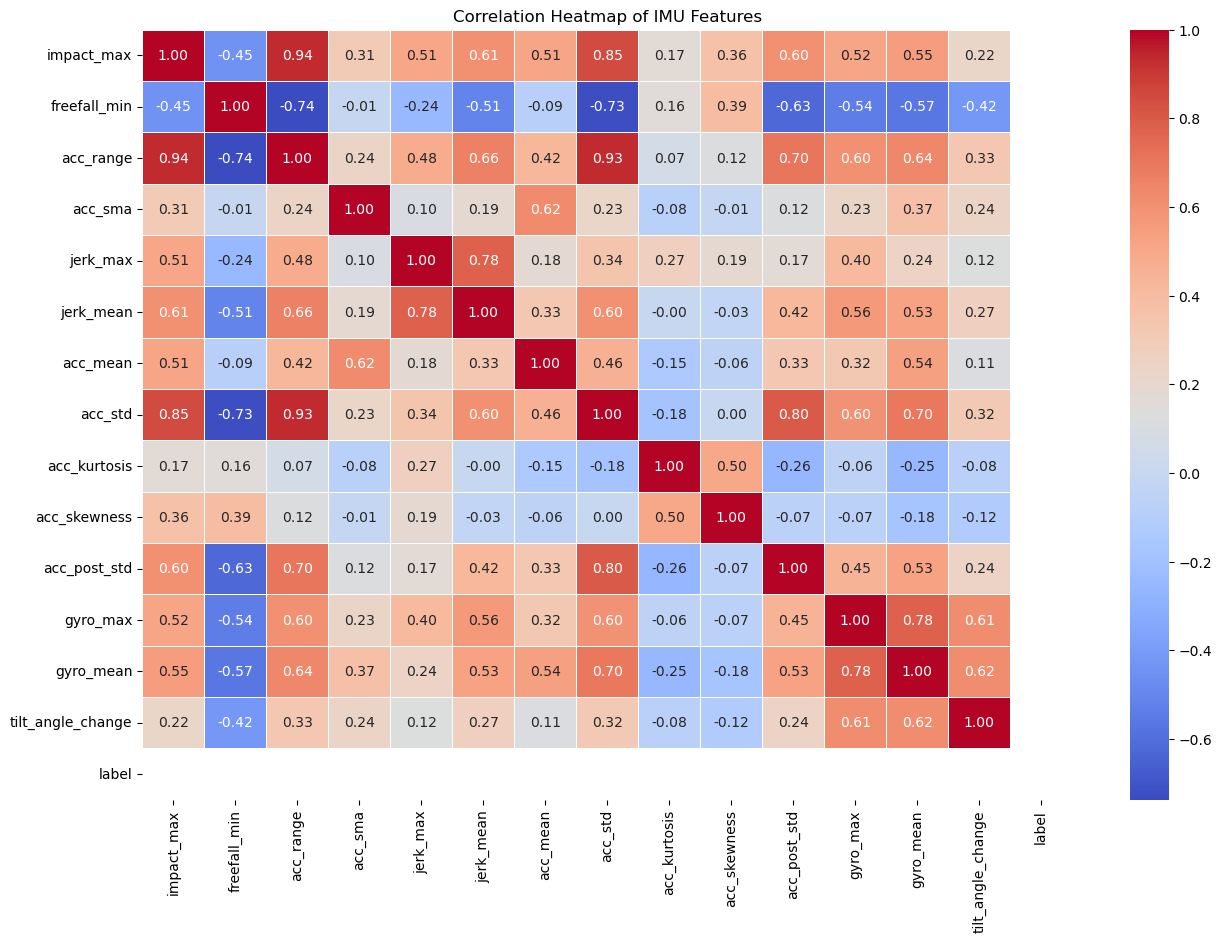

In [32]:
plt.figure(figsize=(15, 10))
correlation_matrix = datad01.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of IMU Features')
plt.show()

## Rada visual

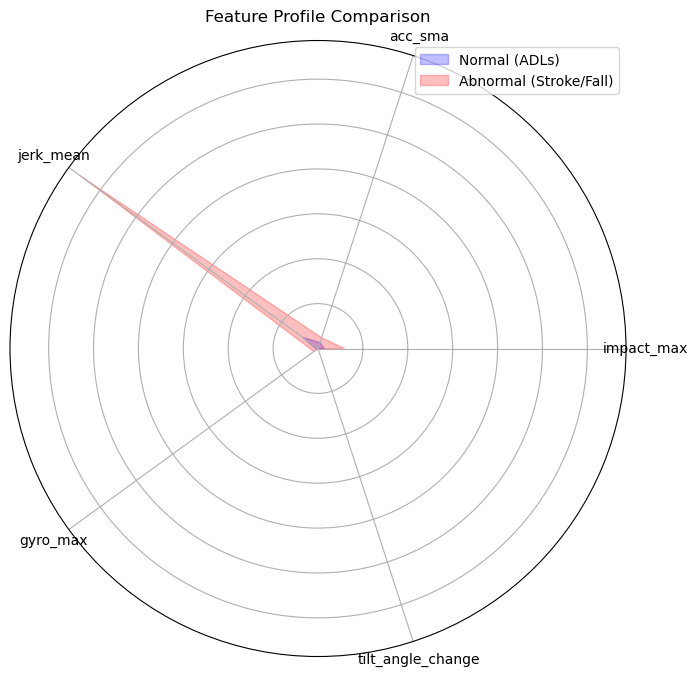

In [34]:
features = ['impact_max', 'acc_sma', 'jerk_mean', 'gyro_max', 'tilt_angle_change']

# Tính trung bình cho từng nhãn (0: Bình thường, 1: Bất thường)
stats_normal = datad01[datad01['label'] == 0][features].mean().tolist()
stats_abnormal = dataf01[dataf01['label'] == 1][features].mean().tolist()

labels = np.array(features)
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()


stats_normal += stats_normal[:1]
stats_abnormal += stats_abnormal[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, stats_normal, color='blue', alpha=0.25, label='Normal (ADLs)')
ax.fill(angles, stats_abnormal, color='red', alpha=0.25, label='Abnormal (Stroke/Fall)')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Feature Profile Comparison')
plt.legend()
plt.show()

## Data distribution of tilt anle change

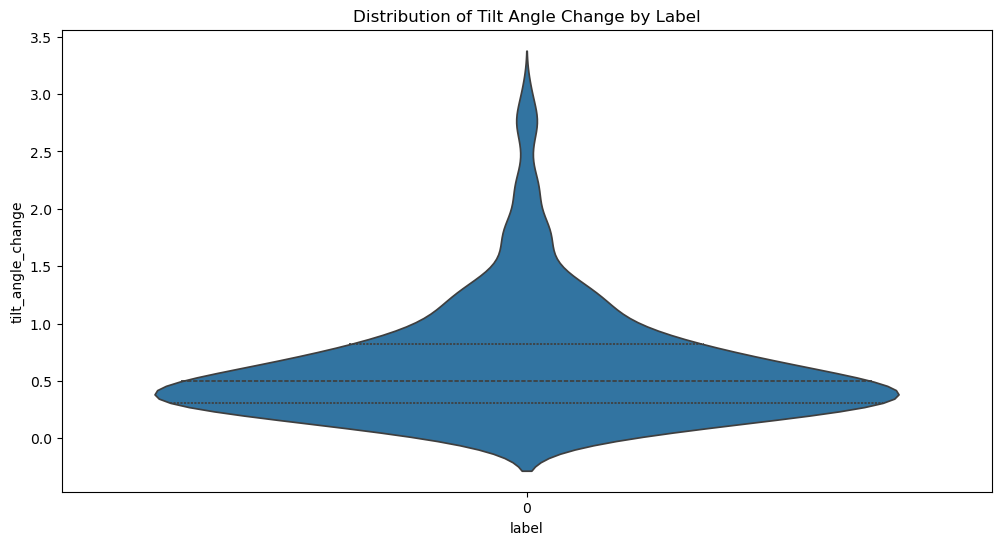

In [48]:
plt.figure(figsize=(12, 6))

sns.violinplot(x='label', y='tilt_angle_change', data=datad01, inner="quart")
plt.title('Distribution of Tilt Angle Change by Label')
plt.show()

# Subplót for recog svm, tilt change, jerk data and Acc-post-std

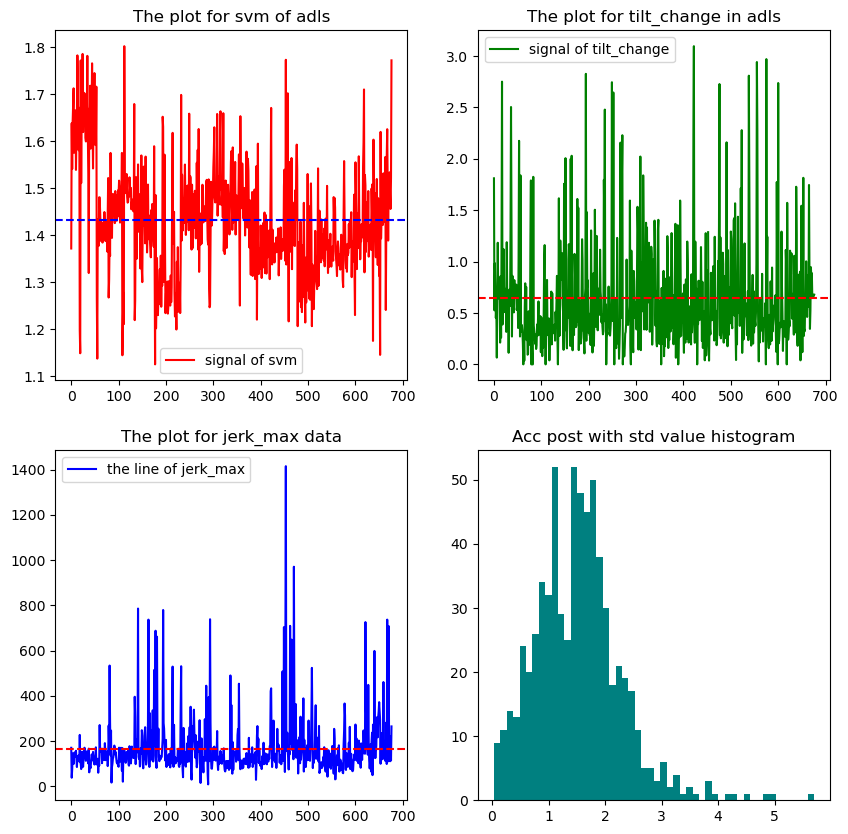

In [16]:
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 2,
                       figsize = (10,10))

ax[0][0].plot(datad01.acc_sma/9.81, color = 'red', label = 'signal of svm')
ax[0,0].legend()
ax[0][0].set(title = 'The plot for svm of adls')
average_sma = datad01['acc_sma'].mean()
ax[0][0].axhline(average_sma/9.81, color = 'blue', linestyle = '--'); 

ax[0][1].plot(datad01.tilt_angle_change, color = 'green', label = 'signal of tilt_change')
ax[0][1].set(title = 'The plot for tilt_change in adls')
average_tilt = datad01['tilt_angle_change'].mean()
ax[0][1].legend();
ax[0][1].axhline(average_tilt, color = 'red', linestyle = '--')


ax[1][0].plot(datad01.jerk_max, color = 'blue', label = 'the line of jerk_max')
ax[1][0].set(title = 'The plot for jerk_max in adls')
average_jerk_max = datad01['jerk_max'].mean()
ax[1][0].axhline(average_jerk_max, color = 'red', linestyle = '--')
ax[1][0].set(title = 'The plot for jerk_max data')
ax[1][0].legend();


ax[1][1].hist( datad01['acc_post_std'], bins = 50, color = 'teal')
ax[1][1].set(title = 'Acc post with std value histogram');

# Fall data set

# Plot for processed_dataset

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataf01 = pd.read_csv('./proccessed_data/F01.csv')
dataf01

,impact_max,freefall_min,acc_range,acc_sma,jerk_max,jerk_mean,acc_mean,acc_std,acc_kurtosis,acc_skewness,acc_post_std,gyro_max,gyro_mean,tilt_angle_change,label
0,64.119966,2.537716,61.582250,23.482,5255.551826,599.780639,15.239375,13.970788,3.860444,2.183021,17.929118,10.203431,3.020451,0.596773,1
1,64.119966,2.537716,61.582250,24.994,5255.551826,661.887590,16.415805,13.836581,3.396523,2.005385,7.732300,10.203431,3.217186,0.654518,1
2,55.618432,4.483302,51.135130,25.034,5342.419864,663.800882,16.504826,13.619693,2.369070,1.900960,16.825884,8.154140,3.493873,0.622025,1
3,55.618432,4.234383,51.384049,29.878,5342.419864,935.614059,19.632406,14.461774,0.451193,1.267365,10.932867,18.304098,4.792154,1.297389,1
4,56.664186,6.249000,50.415186,28.848,5627.523878,775.634771,19.606173,14.593023,1.434412,1.670474,17.531734,11.384200,4.753262,0.981816,1
5,56.664186,3.828838,52.835348,29.962,5627.523878,878.439418,20.065200,15.206295,0.684605,1.399123,8.778577,11.384200,4.421550,1.033327,1
6,57.686134,2.722132,54.964002,30.220,4977.514440,732.021292,19.784501,16.059479,-0.169504,1.089836,18.933044,9.759611,3.074820,0.641407,1
7,57.686134,2.722132,54.964002,31.030,4977.514440,764.795833,20.182485,15.834202,-0.137777,1.084809,9.166507,9.759611,3.504565,0.640138,1
8,66.527588,1.140175,65.387413,23.008,4067.225713,641.893659,15.541873,13.851537,2.776409,1.840823,16.466968,8.389279,2.666127,1.236690,1
9,66.527588,1.140175,65.387413,23.638,4067.225713,686.214218,15.729635,13.806800,2.750032,1.819642,7.498228,8.389279,2.879812,1.188415,1


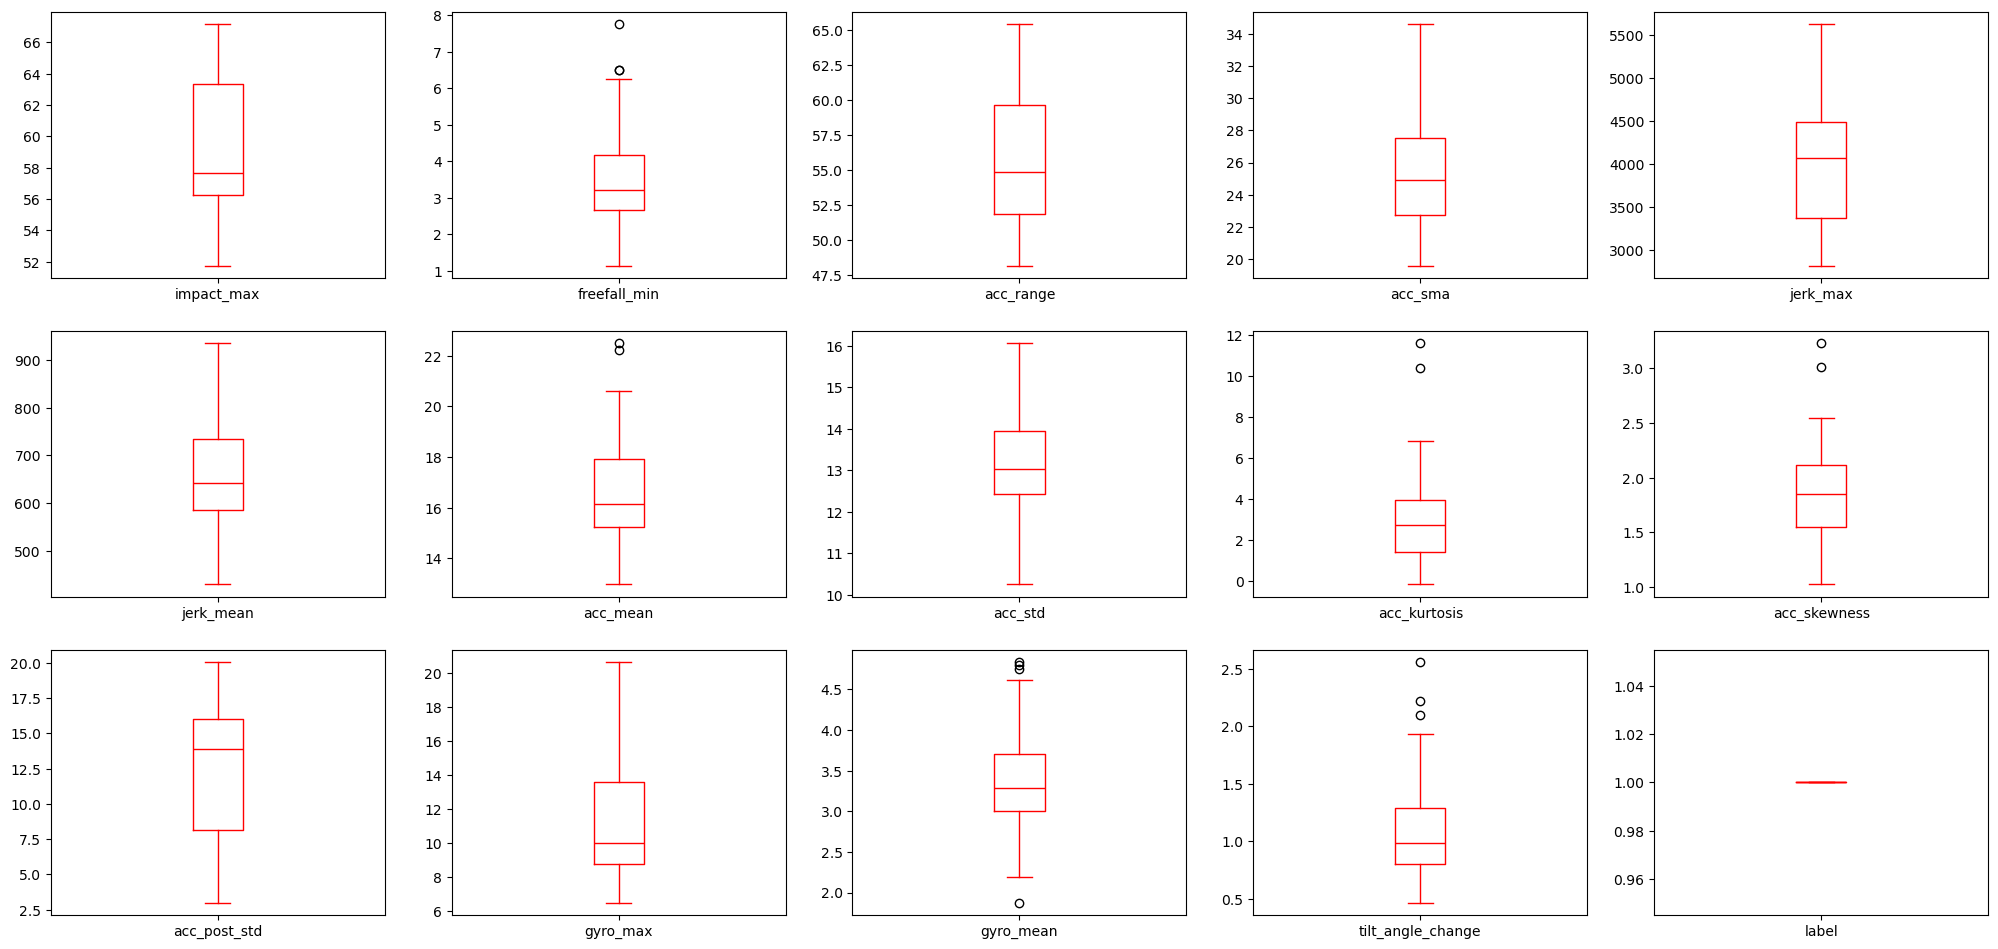

In [23]:
dataf01.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(25,20), color='red');

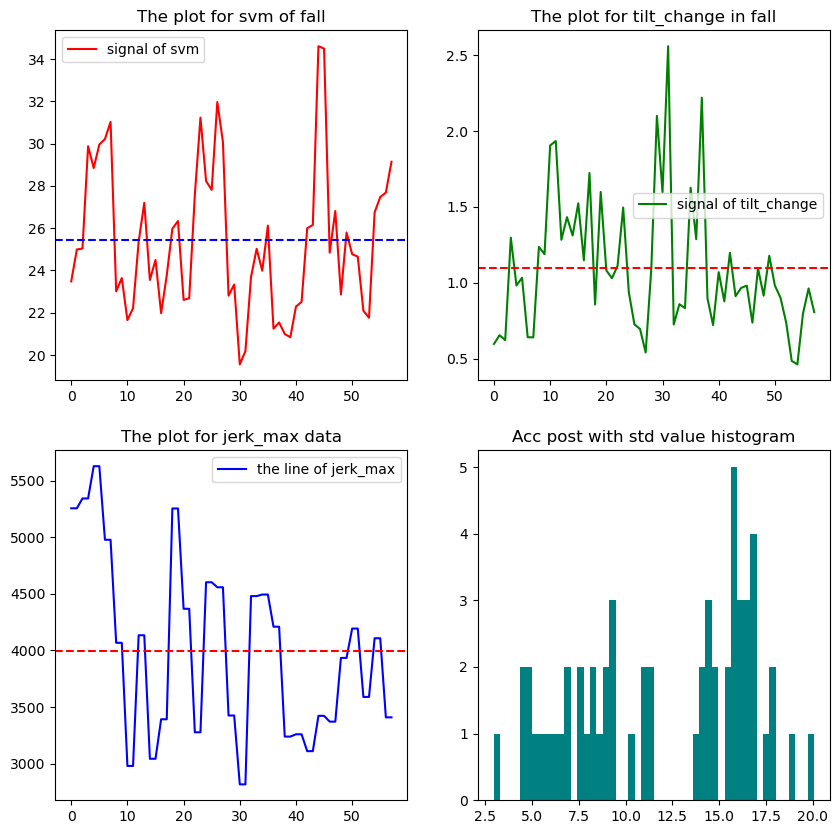

In [20]:
fig, ax = plt.subplots(nrows = 2,
                       ncols = 2,
                       figsize = (10,10))

ax[0][0].plot(dataf01.acc_sma, color = 'red', label = 'signal of svm')
ax[0,0].legend()
ax[0][0].set(title = 'The plot for svm of fall')
average_sma = dataf01['acc_sma'].mean()
ax[0][0].axhline(average_sma, color = 'blue', linestyle = '--'); 

ax[0][1].plot(dataf01.tilt_angle_change, color = 'green', label = 'signal of tilt_change')
ax[0][1].set(title = 'The plot for tilt_change in fall')
average_tilt = dataf01['tilt_angle_change'].mean()
ax[0][1].legend();
ax[0][1].axhline(average_tilt, color = 'red', linestyle = '--')


ax[1][0].plot(dataf01.jerk_max, color = 'blue', label = 'the line of jerk_max')
ax[1][0].set(title = 'The plot for jerk_max in adls')
average_jerk_max = dataf01['jerk_max'].mean()
ax[1][0].axhline(average_jerk_max, color = 'red', linestyle = '--')
ax[1][0].set(title = 'The plot for jerk_max data')
ax[1][0].legend();


ax[1][1].hist( dataf01['acc_post_std'], bins = 50, color = 'teal')
ax[1][1].set(title = 'Acc post with std value histogram');